In [1]:
from Scripts.Data.AiShellData import AiShellData
from Scripts.Models.DataParsers.AcousticParser import AcousticDataParser, AcousticLabelParser
import matplotlib.pyplot as plt

In [2]:

cache_dir = 'debug/cache'

'''一个拼音最短大概0.1s,
若hop_s为0.016s,那么6.25个hop覆盖0.1s'''
"""
audio_filepath:一个音频文件路径
fft_s:一个短时傅里叶变换的窗长，单位为秒
hop_s：窗之间间隔长，单位为秒

返回：行数为 duration_s(音频长度，秒)//hop_s, 列数为 fft_s * target_sr//2 的二维数组；
    纵向代表时间(每行跨越hop_s秒)，横向代表频率（物理范围：0至(target_sr//2) Hz,每列跨越fft_s Hz），元素大小代表能量（单位：db）
"""
stft_fea = {
    'name':'stft',
    'kwargs':{
        'fft_s': 0.128,  # fft_s:一个短时傅里叶变换的窗长，单位为秒
        'hop_s': 0.016,  # hop_s：窗之间间隔长，单位为秒
        'target_sr': 8000, # 统一音频采样率目标，音频将自动重采样为该采样率
    }
}

"""
audio_filepath:一个音频文件路径
fft_s:一个短时傅里叶变换的窗长，单位为秒
hop_s：窗之间间隔长，单位为秒

返回：行数为 duration_s(音频长度,秒)//hop_s, 列数为 n_mels 的二维数组，纵向代表时间(一行跨越 hop_s 秒)，横向代表频率（物理范围：0-(target_sr//2) Hz,一列跨越fft_s Hz），大小代表能量（单位：db）
"""
mel_fea = {
    'name':'mel',
    'kwargs':{
        'fft_s': 0.128,  # fft_s:一个短时傅里叶变换的窗长，单位为秒
        'hop_s': 0.016,  # hop_s：窗之间间隔长，单位为秒
        'target_sr': 8000, # 统一音频采样率目标，音频将自动重采样为该采样率
        'n_mels': 128 # mel 特征维度
    }
}


In [3]:
example_fp = "/data/speech/AiShell/data_aishell/wav/train/S0002/BAC009S0002W0122.wav"
dataObj = AiShellData(filepath = example_fp)

In [4]:
stft_dataparser = AcousticDataParser(
    feature=stft_fea, example_audio_Obj=dataObj, cache_dir=cache_dir, open_cache = False)
mel_dataparser = AcousticDataParser(
    feature=mel_fea, example_audio_Obj=dataObj, cache_dir=cache_dir, open_cache = False)

使用样例数据: /data/speech/AiShell/data_aishell/wav/train/S0002/BAC009S0002W0122.wav
使用特征: stft 特征参数: {'fft_s': 0.128, 'hop_s': 0.016, 'target_sr': 8000} 特征长度: 513
使用样例数据: /data/speech/AiShell/data_aishell/wav/train/S0002/BAC009S0002W0122.wav
使用特征: mel 特征参数: {'fft_s': 0.128, 'hop_s': 0.016, 'target_sr': 8000, 'n_mels': 128} 特征长度: 128


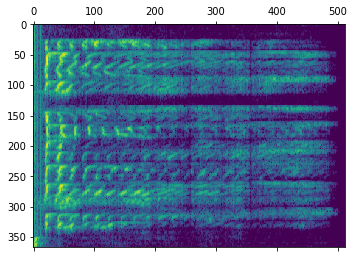

In [5]:
data = stft_dataparser(dataObj)
# label = labelparser(data_obj)
plt.matshow(data)

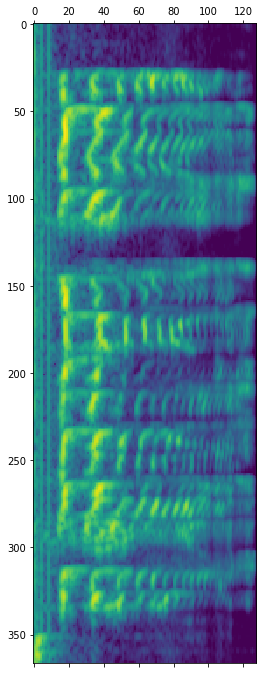

In [6]:
data = mel_dataparser(dataObj)
# label = labelparser(data_obj)
plt.matshow(data)